In [1]:
from scipy import stats
from selenium import webdriver
from bootstrap import *
from rp_data import *
from web import *
from data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import re

In [2]:
html = get_html(f'https://www.baseball-reference.com/leagues/MLB/2015-value-pitching.shtml')
html
# Can use pandas to parse the page source into dataframes

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=76.0.3809.132)


In [3]:
# Chose last 5 years because relief pitcher usage is evolving, 
# and I am mostly interested in the 2019 season. e.g 1.4 rp per game in 1908 to around 4.4 now.

#Value pitching for last 5 years:
#This table includes stats for all pitchers and their salaries

for num in range(2015, 2020):
 html = get_html(f'https://www.baseball-reference.com/leagues/MLB/{num}-value-pitching.shtml')
 table = pd.read_html(html)
# table[-1].to_csv(f'data/{num}-value.csv')

#Reliever stats for the last 5 years:
#This table includes stats for only relief pitchers
for num in range(2015, 2020):
  html = get_html(f'https://www.baseball-reference.com/leagues/MLB/{num}-reliever-pitching.shtml')
  table = pd.read_html(html)
#  table[-1].to_csv(f'data/{num}-reliever.csv')

#Saving locally as CSV files since the table layout and data changes day to day

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=76.0.3809.132)


In [4]:
#Now that I have the data saved as CSV files, I want to collect all the file names as a list
#to easily read all of them into a panda database.

#Glob helps find pathnames

relievers_csv = glob.glob('data/*-reliever*')
relievers_csv.sort(reverse=True)
salaries_csv = glob.glob('data/*-value*')
salaries_csv.sort(reverse=True)

print(relievers_csv)
print(salaries_csv)

['data/2019-reliever.csv', 'data/2018-reliever.csv', 'data/2017-reliever.csv', 'data/2016-reliever.csv', 'data/2015-reliever.csv']
['data/2019-value.csv', 'data/2018-value.csv', 'data/2017-value.csv', 'data/2016-value.csv', 'data/2015-value.csv']


In [5]:
#Open all the csv files and put the dfs into a list

relievers = []
salaries = []

for file in relievers_csv:
    path, filename = os.path.split(file)
    year = re.findall('\d\d\d\d', filename)[0] #find only strings of 4 digits
    temp_df = pd.read_csv(file)
    temp_df['file_year'] = year #append year as a column to file as a reference
    relievers.append(temp_df)

for file in salaries_csv:
    path, filename = os.path.split(file)
    year = re.findall('\d\d\d\d', filename)[0]
    temp_df = pd.read_csv(file)
    temp_df['file_year'] = year
    salaries.append(temp_df)

In [6]:
relievers[0].head()

,Unnamed: 0,Rk,Name,Age,Tm,IP,G,GR,GF,Wgr,...,Bhd,Runr,Empt,>3o,<3o,IPmult,0DR,Out/GR,Pit/GR,file_year
0,0,1,Fernando Abad*,33,SFG,8.2,13,13,1,0,...,6,8,5,1,8,2,3,2.0,9,2019
1,1,2,Bryan Abreu,22,HOU,3.0,2,2,1,0,...,1,0,2,1,0,1,0,4.5,25,2019
2,2,3,Jason Adam,27,TOR,14.2,14,14,1,1,...,7,5,9,3,4,5,2,3.1,20,2019
3,3,4,Austin Adams,32,TOT,16.2,15,15,9,0,...,12,2,13,4,2,4,3,3.3,21,2019
4,4,5,Austin Adams,32,MIN,2.2,2,2,1,0,...,0,0,2,1,1,1,0,4.0,37,2019


In [7]:
salaries[0].head()

,Unnamed: 0,Rk,Name,Age,Tm,IP,G,GS,R,RA9,...,WAA,gmLI,WAAadj,WAR,RAR,waaWL%,162WL%,Salary,Acquired,file_year
0,0,1,Fernando Abad*,33,SFG,8.2,13,0,5,5.19,...,-0.1,1.65,0.0,-0.1,0,.494,.499,"$100,000",Free Agency,2019
1,1,2,Bryan Abreu,22,HOU,3.0,2,0,0,0.00,...,0.2,.01,-0.1,0.1,2,.581,.501,NaN,Amateur Free Agent,2019
2,2,3,Jason Adam,27,TOR,14.2,14,0,8,4.91,...,0.0,1.24,0.0,0.1,2,.501,.500,NaN,Purchased,2019
3,3,4,Austin Adams,32,2TM,16.2,15,0,13,7.02,...,-0.3,.33,0.1,0.0,-2,.481,.500,NaN,Waivers,2019
4,4,5,Austin Adams,28,2TM,28.0,25,2,11,3.54,...,0.4,1.28,0.0,0.7,7,.515,.503,NaN,Traded,2019


In [8]:
#creating the dfs per year and cleaning them

dfs = [clean_df(merge_df(r, s)) for r, s in zip(relievers, salaries)]

In [9]:
dfs[0].head()

,Name,Age,Tm,G,GR,SV%,IS%,RA9,RAA,RAR,WAA,WAR,file_year_x,file_year_y,Salary,GR%
0,Fernando Abad*,33,SFG,13,13,NaN,23%,5.19,-1,0,-0.1,-0.1,2019,2019,"$100,000",1.0
1,Chance Adams,24,NYY,10,10,33%,33%,7.61,-8,-6,-0.8,-0.4,2019,2019,"$556,725",1.0
2,Ehire Adrianza,29,MIN,1,1,NaN,NaN,27.00,-2,-2,-0.2,-0.1,2019,2019,"$1,300,000",1.0
3,Matt Albers,36,MIL,62,62,80%,23%,5.11,-4,1,-0.4,-0.1,2019,2019,"$2,500,000",1.0
4,Hanser Alberto,26,BAL,1,1,NaN,NaN,18.00,-1,-1,-0.1,-0.1,2019,2019,"$578,000",1.0


In [10]:
# I see that even after using inner join, 
# there are some starting pitchers that have entered the game in relief on occasion and may skew the data.

# I already made a column GR/G, and will now exclude those that have entered a game in relief less 
# than 50% of the time

#Panda query to see if exclusion will work as intended

dfs[0][dfs[0]['GR%'] < .50]


,Name,Age,Tm,G,GR,SV%,IS%,RA9,RAA,RAR,WAA,WAR,file_year_x,file_year_y,Salary,GR%
11,Chase Anderson,31,MIL,28,5,NaN,0%,4.73,3,13,0.3,1.2,2019,2019,"$6,500,000",0.178571
20,Manny Banuelos*,28,CHW,14,6,NaN,20%,7.52,-12,-6,-1.1,-0.6,2019,2019,"$559,000",0.428571
30,Shane Bieber,24,CLE,31,1,NaN,NaN,3.45,31,53,3.2,4.9,2019,2019,"$559,600",0.032258
37,Steven Brault*,27,PIT,22,6,NaN,NaN,4.40,10,19,1.1,1.9,2019,2019,"$574,500",0.272727
51,Carlos Carrasco,32,CLE,16,4,0%,NaN,5.61,-5,3,-0.5,0.2,2019,2019,"$9,750,000",0.250000
62,Yonny Chirinos,25,TBR,23,6,NaN,0%,3.91,14,29,1.4,2.6,2019,2019,"$561,800",0.260870
71,Dylan Covey,27,CHW,17,6,0%,80%,8.02,-15,-9,-1.4,-0.9,2019,2019,"$571,000",0.352941
80,Ross Detwiler*,33,CHW,15,6,NaN,100%,7.29,-10,-4,-0.9,-0.4,2019,2019,"$100,000",0.400000
92,Zach Eflin,25,PHI,28,4,NaN,NaN,4.89,3,15,0.3,1.4,2019,2019,"$590,000",0.142857
93,Jerad Eickhoff,28,PHI,12,2,100%,NaN,5.71,-5,0,-0.4,0.1,2019,2019,"$975,000",0.166667


In [11]:
# Also going to exclude pitchers with 5 or less games played. 
# It looks like there are a lot of position players (batters) who have pitched a couple of times 
# when their team is blown out that may skew the performance stats.

dfs[0][dfs[0]['GR'].astype(int) < 5].head(30)

,Name,Age,Tm,G,GR,SV%,IS%,RA9,RAA,RAR,WAA,WAR,file_year_x,file_year_y,Salary,GR%
2,Ehire Adrianza,29,MIN,1,1,NaN,NaN,27.00,-2,-2,-0.2,-0.1,2019,2019,"$1,300,000",1.000000
4,Hanser Alberto,26,BAL,1,1,NaN,NaN,18.00,-1,-1,-0.1,-0.1,2019,2019,"$578,000",1.000000
8,Aaron Altherr,28,PHI,1,1,NaN,NaN,9.00,0,0,0.0,0.0,2019,2019,"$1,350,000",1.000000
12,Cody Anderson,28,CLE,5,3,0%,67%,9.35,-5,-4,-0.4,-0.6,2019,2019,"$641,250",0.600000
15,Pedro Araujo,25,BAL,1,1,NaN,NaN,27.00,-2,-2,-0.1,-0.1,2019,2019,"$557,000",1.000000
16,Alex Avila,32,ARI,2,2,NaN,NaN,4.50,0,0,0.0,0.0,2019,2019,"$4,250,000",1.000000
19,Anthony Banda*,25,TBR,1,1,NaN,NaN,9.00,-1,0,-0.1,0.0,2019,2019,"$556,800",1.000000
24,Tony Barnette,35,CHC,2,2,NaN,0%,6.75,0,0,0.0,0.0,2019,2019,"$750,000",1.000000
30,Shane Bieber,24,CLE,31,1,NaN,NaN,3.45,31,53,3.2,4.9,2019,2019,"$559,600",0.032258
49,Victor Caratini,25,CHC,2,2,NaN,NaN,9.00,-1,-1,-0.1,0.0,2019,2019,"$569,500",1.000000


In [12]:
#Using function from my data cleaning module to remove the data within the parameters stated above
dfs = [exclusion(df) for df in dfs]

In [13]:
# Need to make the data usable for statistical tests later, all numbers in str

# Salary needs to have the $ and , characters removed and converted to int

# Other columns need to be changed to float.

# SV% and IS% are edge cases that I sorted out later because there wasn't an easy solution to the NaN values

col_names = ['RAA','RAR', 'RA9', 'WAA', 'WAR']

for df in dfs:
    df.reset_index(drop= True)
    salary_to_int(df)
    for col_name in col_names:
        column_to_num(df, col_name)


In [14]:
dfs[0].head()

,Name,Age,Tm,G,GR,SV%,IS%,RA9,RAA,RAR,WAA,WAR,file_year_x,file_year_y,Salary,GR%
0,Fernando Abad*,33,SFG,13,13,NaN,23%,5.19,-1.0,0.0,-0.1,-0.1,2019,2019,100000,1.0
1,Chance Adams,24,NYY,10,10,33%,33%,7.61,-8.0,-6.0,-0.8,-0.4,2019,2019,556725,1.0
3,Matt Albers,36,MIL,62,62,80%,23%,5.11,-4.0,1.0,-0.4,-0.1,2019,2019,2500000,1.0
5,Victor Alcantara,26,DET,43,43,0%,48%,5.77,-2.0,2.0,-0.2,0.1,2019,2019,559100,1.0
6,Scott Alexander*,29,LAD,28,28,NaN,56%,3.63,1.0,2.0,0.1,0.2,2019,2019,575000,1.0


In [15]:
#Created a class called rp_data that I can now run all my statistical tests on easily

data = rp_data(dfs)

print(data)

The years in this data set range from 2015 to 2019.


In [16]:
#columns that I'm interested in
col_names = ['RA9', 'RAA', 'RAR', 'WAA', 'WAR']

In [17]:
data.year(0)

2019


In [18]:
#Let's check out some percentiles for the performance metrics of interest

#create_df(idx, percentile, col_names)

data.create_df(0, 70, col_names)

,p-values,hp_means,lp_means
RA9,0.016406,4.660746,5.326129
RAA,0.031453,0.761194,-1.490323
RAR,0.034035,5.537313,3.064516
WAA,0.035909,0.077612,-0.136129
WAR,0.029325,0.513433,0.247742


In [19]:
data.create_df(0, 80, col_names)

,p-values,hp_means,lp_means
RA9,0.017098,4.523333,5.278362
RAA,0.020215,1.400000,-1.372881
RAR,0.016419,6.355556,3.163842
WAA,0.021000,0.142222,-0.125989
WAR,0.020751,0.584444,0.262712


In [20]:
#What about the performance metrics for all the years scraped?

#create_sum_df(percentile, col_names)

data.create_sum_df(80, col_names)


,p-values,hp_means,lp_means
RA9,0.000777,4.228079,4.768947
RAA,0.002282,1.802956,-0.044610
RAR,0.002205,6.724138,4.633209
WAA,0.002338,0.197044,0.007683
WAR,0.000321,0.683744,0.416605


In [21]:
# My edge cases due to some pitchers not getting any save opportunities 
# or others coming in relief with runners on
# Show ranges from 70 - 90

data.SV(0, 70)

For the MLB season of 2019, the save opportunities converted % for the higher paid group is 0.49666666666666665
and the lower paid group % is 0.33405405405405403 with a p-value of 0.005349314606231253.


In [22]:
data.IS(0, 60)

# Nothing significant

For the MLB season of 2019, the inherited runners scored % for the higher paid group is 0.29717647058823504
and the lower paid group % is 0.3433333333333334 with a p-value of 0.07524338643782108.


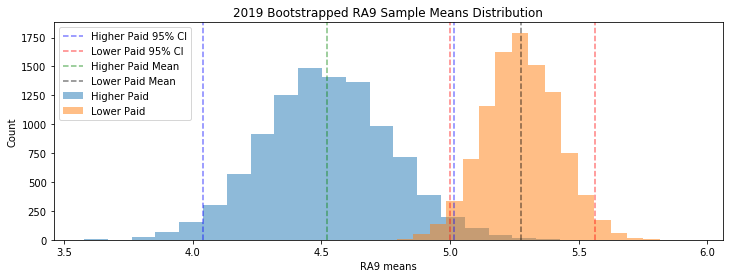

In [23]:
# Let's bootstrap the samples from 2019 since this is the year where there seems to be more observed
# failures by elite pitchers who signed a larger contract.

#bootstrap(idx, percentile, col_name, n_sims = 10000) 10000 as default
data.bootstrap(0, 80, 'RA9')

In [24]:
#If you want to see the exact numbers
data.bootstrap_stats()


    The 95% confidence intervals for the higher paid group ranges from 4.038661111111112 to 5.0153388888888895.
    The lower paid group ranges from 4.99987429378531 and 5.563002824858756.
    Means of the distribution - 
    Higher Paid Group: 4.5201096000000005
    Lower Paid Group:5.27717404519774
     


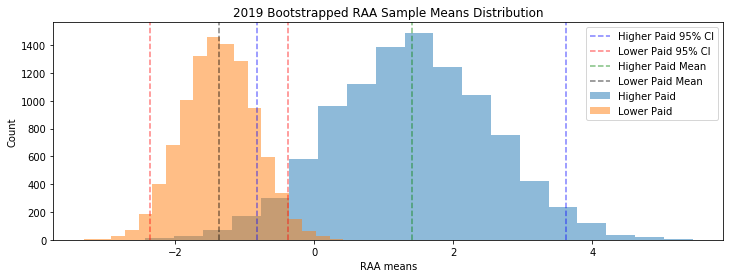

In [25]:
data.bootstrap(0, 80, 'RAA')

In [26]:
data.bootstrap_stats()

# Interesting to note that for this particular group of high paid pitchers in 2019,
# there are some negative means that fall within the 95% confidence interval.
# There is a healthy chance to observe this group performing worse than the average pitcher in the league
# as the RAA performance metric is how many runs better they are compared to the average pitcher in the league.



    The 95% confidence intervals for the higher paid group ranges from -0.8222222222222222 to 3.6222222222222222.
    The lower paid group ranges from -2.3673728813559323 and -0.37274011299435234.
    Means of the distribution - 
    Higher Paid Group: 1.4026066666666666
    Lower Paid Group:-1.372829943502825
     


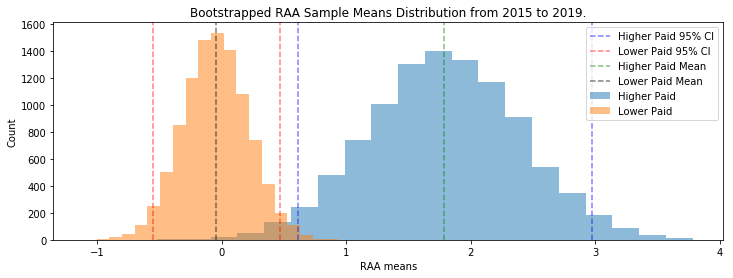

In [27]:
data.bootstrap_sum(80, 'RAA')

In [28]:
data.bootstrap_sum_stats()

#I will say that the actual mean of the population is somewhere around 1.8 for the higher paid
# and 0 for the lower paid pitchers.


    The 95% confidence intervals for the higher paid group ranges from 0.6107142857142859 to 2.9754926108374367.
    The lower paid group ranges from -0.5477385377942999 and 0.46843246592317184.
    Means of the distribution - 
    Higher Paid Group: 1.790514285714286
    Lower Paid Group:-0.04731325898389096
     


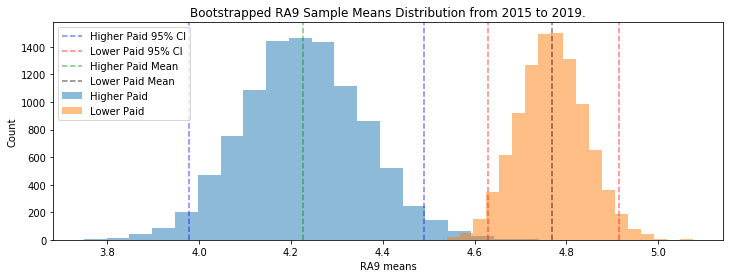

In [29]:
data.bootstrap_sum(80, 'RA9')

In [30]:
# Let's find the Pearson correlation coefficient between salary and some performance metrics
# For year 2019

data.corr(0, 60, 'RAA')

# Do not prove that there is a relationship between salary and performance

For the lower paid pitcher group: 
The correlation coefficent is 0.08004779266113445 and the p-value is 0.3597125289427897
For the higher paid pitcher group: 
The correlation coefficent is -0.08422313217334028 and the p-value is 0.4326161119963561


In [31]:
data.corr(0, 80, 'RAA')

# Maybe if I set my significance level to .10 then this might be true.
# Interesting because for the higher paid group in 2019,
# there is a negative correlation between salary and performance.

For the lower paid pitcher group: 
The correlation coefficent is 0.13909827605755581 and the p-value is 0.06482586361809187
For the higher paid pitcher group: 
The correlation coefficent is -0.2519783442382054 and the p-value is 0.09495473425562297


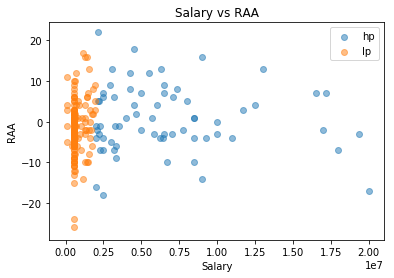

In [32]:
# Let's look at it visually

# Show 70 and 80 percentiles

data.scatter(0,70, 'RAA')

# Ideally you want to see anyone above 5 mil or even 10 mil to be at least above average.

# You can see that out of the top 5 paid relief pitchers, 4 are below average so that might be a reason
# why spectators have this observation. Top paid probably also draws more media attention.

In [ ]:
len(data.higher_paid), len(data.lower_paid)

In [35]:
# Go through a couple of percentiles

data.corr_sum(70, 'RAA')

For the lower paid pitcher group: 
The correlation coefficent is 0.0624003763771874 and the p-value is 0.09758095701301557
For the higher paid pitcher group: 
The correlation coefficent is 0.019734160417255196 and the p-value is 0.7318296200996384


In [36]:
# This one is difficult to graph the correlation. 
# Pearsons correlation coefficient is a measure of the linear correlation between 2 variables.
# Without adjusting salaries for inflation by year, it will be difficult to see a linear relationship.
# Higher paid pitchers in 2015 might be in the lower paid group as a whole, or vice versa
# In 2015, the highest paid reliever was getting 10million, vs 20 mil in 2019.

data.dfs[0].Salary.max(), data.dfs[2].Salary.max(), data.dfs[4].Salary.max()

(20000000, 17200000, 10000000)

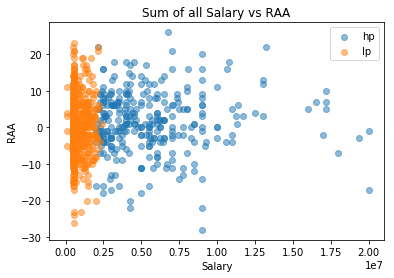

In [37]:
#show 70, 80, 90 percentiles

data.sum_data(70, 'RAA') #need to set higher_paid_sum and lower_paid_sums

fig, ax = plt.subplots()
ax.scatter(data.higher_paid_sum.Salary, data.higher_paid_sum.RAA, alpha =0.5, label='hp')
ax.scatter(data.lower_paid_sum.Salary, data.lower_paid_sum.RAA, alpha=0.5, label='lp')
ax.set_title('Sum of all Salary vs RAA')
ax.set_xlabel('Salary')
ax.set_ylabel('RAA')
ax.legend()
